# DATA100 S15 - House Prices EDA

#### Submitted by: Group 10

<b>CORNELIO</b>, Job - 3rd Year, COS<br>
<b>RAMOS</b>, Cy Adrienne C. - 3rd Year, COS<br>
<b>SIOCO</b>, Megan Rylene A. - 3rd Year, CCS<br> 
<b>SULIT</b>, Anne Gabrielle M. - 4th Year, CCS


#### Submitted to:
MR. EDUARDO F. VALDEZ

## 1. Introduction

Affordable housing is currently lacking in the United States. There are almost 11 million families that are of extremely low income, and they need more than 7 million houses. This problem worsens the years go by. This is an important issue to solve due to its effect on the families that cannot afford housing, making them experience homelessness, being cost-burdened by rent, and not having sufficient assistance from the government. Further, this affects the future generations as it introduces a cycle of poverty and limited opportunities in families.

Existing observations regarding the housing prices usually monitor large-scale variables outside the house sale transactions, such as interest rates, demographics, economy, and government programs. In this project, we aim to analyze variables that are attributes of the properties and their transaction history to see their effects on the prices of housing using data analysis. 

**Primary Goals**

1. *Variable Relationships*: Explore how different factors such as size, location, amenities, and renovation history correlate with housing prices.
2. *Socio-Economic Insights*: Examine how housing attributes reflect disparities across socio-economic groups and highlight pressing issues in housing affordability and urban planning.
3. *Answer Research Questions*: Investigate key questions about the dataset to draw insights into the social and environmental implications of housing in King County.

**Research Questions**

- *Aesthetic vs. Size*: Is there a relationship between housing aesthetics (e.g., waterfront, view, location) and property size (e.g., floors, room size, lot size)? What is the ratio of aesthetic to non-aesthetic houses?
- *Condition Over Time*: Do older houses have lower quality (e.g., condition, grade), and are they more likely to undergo renovations?
- *Urban Density*: What is the average number of houses per zip code, and does this reflect overly dense urban planning?
- *Price Correlations*: Which variables have the strongest correlations with housing prices?




### The Dataset


This project uses the [House Sales in King County](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data) dataset from Kaggle that contains house sale transactions for King County, including Seattle, WA, and the USA. It includes homes sold between May 2014 and May 2015. Each data instance contains details about each property’s physical attributes, location, and transaction history, all of which are essential to find out what factors influence house sales. As recommended, the dataset can be viewed as a regression task.


The notebook will refer to this dataset as `house_prices_df`. It is provided as a single .csv file where each row represents a property transaction, and each column corresponds to a specific attribute of that property. 

**Dataset Structure**
- **Observations**: 21,614
- **Variables**: 20


**Transaction Attributes (2)**:
- **`date`**: Date of sale for the house.
- **`price`**: Sale price of the house in USD.

**House Attributes (18)**:
- **`bedrooms`**: Number of bedrooms in the house.
- **`bathrooms`**: Number of bathrooms in the house.
- **`sqft_living`**: Living area size in square feet.
- **`sqft_lot`**: Total lot size in square feet.
- **`floors`**: Number of floors in the house.
- **`waterfront`**: Indicates if the house has a waterfront view (1 = Yes, 0 = No).
- **`view`**: Quality of the view from the house, rated from 0 (no view) to 4 (excellent view).
- **`condition`**: Condition of the house on a scale from 1 (poor) to 5 (excellent).
- **`grade`**: Construction quality grade based on materials and workmanship, with higher grades indicating better quality.
- **`sqft_above`**: Size of the above-ground area in square feet.
- **`sqft_basement`**: Size of the basement area in square feet.
- **`yr_built`**: Year the house was built.
- **`yr_renovated`**: Year the house was last renovated (0 if never renovated).
- **`zipcode`**: 5-digit postal code for the house location.
- **`lat`**: Latitude coordinate of the house location.
- **`long`**: Longitude coordinate of the house location.
- **`sqft_living15`**: Average interior living space in square feet for the nearest 15 houses.
- **`sqft_lot15`**: Average lot size in square feet for the nearest 15 houses.

**Identifier (1)**:
- **`Id`**: Unique identifier for each house.

## 2. List of Requirements

**Importing Libraries**

For this project, we will utilize the Python packages **`pandas`** and **`numpy`**. `pandas` is a package that allows working with data structures for an easier experience dealing with data. On the other hand, `numpy` is a library that supports dealing with multi-dimensional arrays and usage of advanced mathematical functions.

In [ ]:
import pandas as pd
import numpy as np


**Loading the Dataset**

In [2]:
house_prices_df = pd.read_csv('kc_house_data.csv')
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Importing the HousePrices Class**

In [3]:
from house_prices import HousePrices

## 3. Exporatory Analysis

To assess the data, we first look at the quantitative variables. We use basic statistics to describe the values of each column, dropping those with categorical values.

In [4]:
statistics = house_prices_df.describe()
statistics.drop(columns=['id','zipcode','lat','long'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


From the table, we can observe the mean, standard deviation, and the quartiles, especially the median or the 50th percentile of the data. We note that the location of the mean with respect to the median can usually be affected by the skewness of values. Using the obtained value, we see notable differences in the mean and median of several variables, such as `price` and `sqft_lot` to name a few. With this, we can check the skewness of the quantitative variables.

In [5]:
skewness = house_prices_df.select_dtypes(exclude=['object', 'category']).drop(columns=['id','zipcode','lat','long'])
skewness.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

We see that the skewness value of `sqft_lot` is the highest, followed by that of `waterfront`, `sqft_lot15`, `price`, and `condition`. The aforementioned variables have skewness values that suggest substantial nonnormality. Further, the remaining variables have generally acceptable skewness. We can further observe the distributions of these variables by showing their respective histograms. The bins of the histograms are adjusted depending on whether they are measurements or counts.

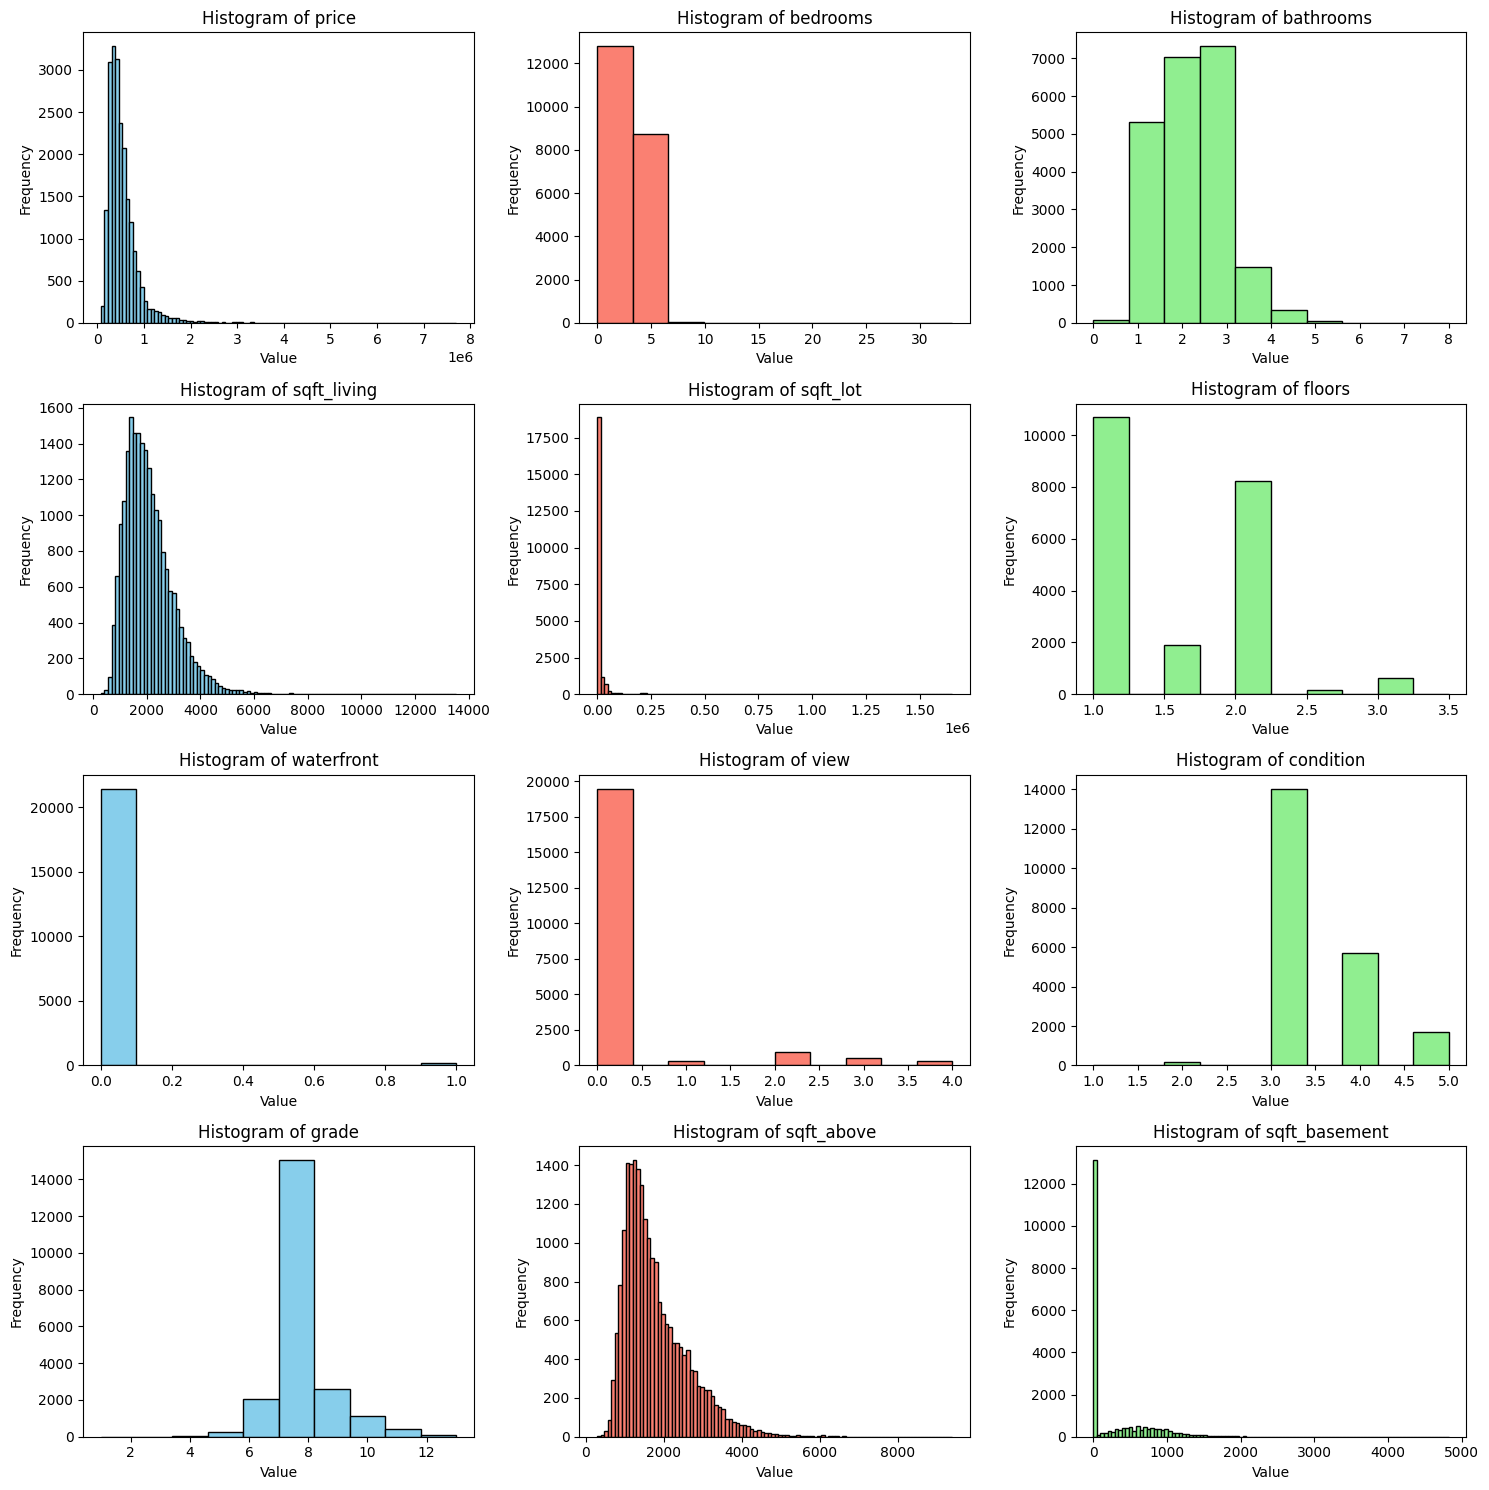

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
axs = axs.flatten()

axs[0].hist(house_prices_df['price'], bins=100, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of price')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(house_prices_df['bedrooms'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of bedrooms')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(house_prices_df['bathrooms'], bins=10, color='lightgreen', edgecolor='black')
axs[2].set_title('Histogram of bathrooms')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

axs[3].hist(house_prices_df['sqft_living'], bins=100, color='skyblue', edgecolor='black')
axs[3].set_title('Histogram of sqft_living')
axs[3].set_xlabel('Value')
axs[3].set_ylabel('Frequency')

axs[4].hist(house_prices_df['sqft_lot'], bins=100, color='salmon', edgecolor='black')
axs[4].set_title('Histogram of sqft_lot')
axs[4].set_xlabel('Value')
axs[4].set_ylabel('Frequency')

axs[5].hist(house_prices_df['floors'], bins=10, color='lightgreen', edgecolor='black')
axs[5].set_title('Histogram of floors')
axs[5].set_xlabel('Value')
axs[5].set_ylabel('Frequency')

axs[6].hist(house_prices_df['waterfront'], bins=10, color='skyblue', edgecolor='black')
axs[6].set_title('Histogram of waterfront')
axs[6].set_xlabel('Value')
axs[6].set_ylabel('Frequency')

axs[7].hist(house_prices_df['view'], bins=10, color='salmon', edgecolor='black')
axs[7].set_title('Histogram of view')
axs[7].set_xlabel('Value')
axs[7].set_ylabel('Frequency')

axs[8].hist(house_prices_df['condition'], bins=10, color='lightgreen', edgecolor='black')
axs[8].set_title('Histogram of condition')
axs[8].set_xlabel('Value')
axs[8].set_ylabel('Frequency')

axs[9].hist(house_prices_df['grade'], bins=10, color='skyblue', edgecolor='black')
axs[9].set_title('Histogram of grade')
axs[9].set_xlabel('Value')
axs[9].set_ylabel('Frequency')

axs[10].hist(house_prices_df['sqft_above'], bins=100, color='salmon', edgecolor='black')
axs[10].set_title('Histogram of sqft_above')
axs[10].set_xlabel('Value')
axs[10].set_ylabel('Frequency')

axs[11].hist(house_prices_df['sqft_basement'], bins=100, color='lightgreen', edgecolor='black')
axs[11].set_title('Histogram of sqft_basement')
axs[11].set_xlabel('Value')
axs[11].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

We can also show the histograms of `sqft_living15` and `sqft_lot15`.

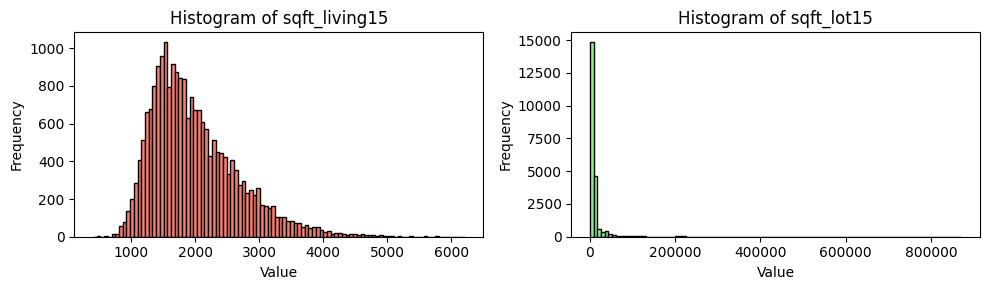

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs = axs.flatten()

axs[0].hist(house_prices_df['sqft_living15'], bins=100, color='salmon', edgecolor='black')
axs[0].set_title('Histogram of sqft_living15')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(house_prices_df['sqft_lot15'], bins=100, color='lightgreen', edgecolor='black')
axs[1].set_title('Histogram of sqft_lot15')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

From the histograms, we can observe that there are possible outliers based on the compactness of the distribution. This is more evident on the histograms of `price`, `bedrooms`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, and `sqft_lot15`. On top of these, it is important that we look at the distribution of the establishment of the houses and their renovations throughout the years. To better see the distribution of housing renovations, we only consider those with renovations done.

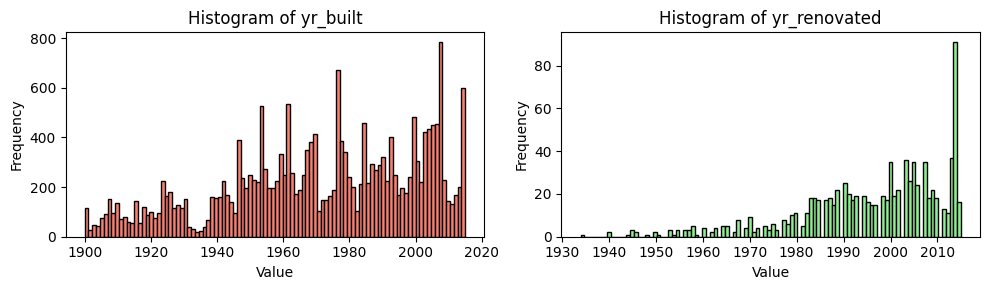

In [8]:
filtered_cat_house_prices_df = house_prices_df[house_prices_df['yr_renovated'] > 0]

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs = axs.flatten()

axs[0].hist(house_prices_df['yr_built'], bins=100, color='salmon', edgecolor='black')
axs[0].set_title('Histogram of yr_built')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(filtered_cat_house_prices_df['yr_renovated'], bins=100, color='lightgreen', edgecolor='black')
axs[1].set_title('Histogram of yr_renovated')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

From this, we can see a general trend of increase in the houses that were built and the houses that were renovated, with the renovations having a significant rise after 2010.

## 4. Data Cleaning

As seen in Section 2 when loading the dataset, its column names and data types are already appropriate for each attribute. This section will focus on checking for possible null values and preparing the dataset for EDA.

First, we check if the dataset has any missing or null values: 

In [198]:
missing_values = house_prices_df.isnull().sum()
missing_values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We conclude that the dataset has no null values. 

Next, we assess outlier data from the dataset. Our group has categorized the dataset's 20 variables into the following four categories. For each of these categories, we will apply a different approach to checking and possibly cleaning the data.

- Continuous Variables
- Discrete/Ordinal Variables
- Binary Variables
- Other Variables

**4.1. Continuous Variables (9):**

- `price`
- `sqft_living`
- `sqft_lot`
- `sqft_above`
- `sqft_basement`
- `lat`
- `long`
- `sqft_living15`
- `sqft_lot15`

These are the most relevant for outlier detection. Let us check for the outliers of each variable using the z-square method and plotting as a boxplot.


Z-Score Outlier Summary:
----------------------------------------
price: 406 outliers (1.88% of values)
sqft_living: 248 outliers (1.15% of values)
sqft_lot: 347 outliers (1.61% of values)
sqft_above: 254 outliers (1.18% of values)
sqft_basement: 247 outliers (1.14% of values)
long: 233 outliers (1.08% of values)
sqft_living15: 237 outliers (1.10% of values)
sqft_lot15: 363 outliers (1.68% of values)


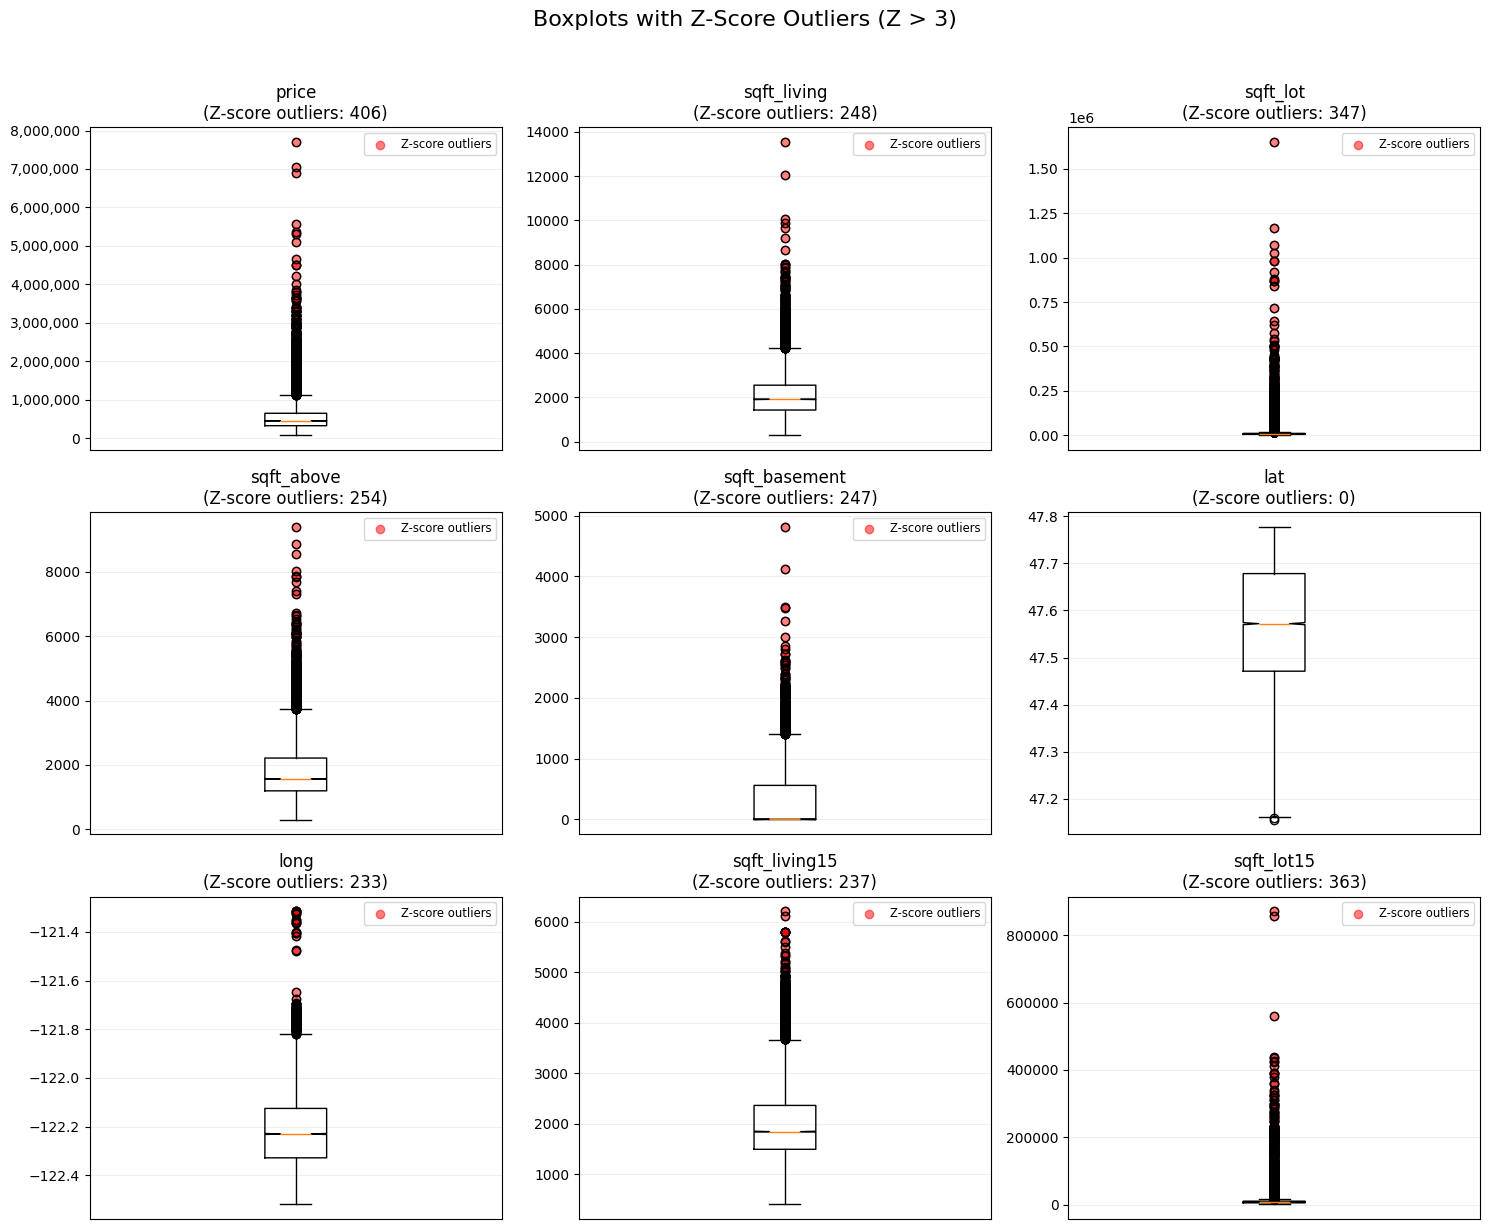

In [199]:
fig, outliers = HousePrices.create_zscore_boxplot(house_prices_df, 3)

From this data, we can see that all continuous variables except `long` are composed of outliers less than 2% of their total observations. We will analyze some outlier samples from each of the variables to see if any dataset changes have to be made.

In [200]:
HousePrices.print_outlier_details(house_prices_df, outliers)


                            OUTLIER ANALYSIS SUMMARY                            

--------------------------------------------------------------------------------
------------------------------------ PRICE -------------------------------------
--------------------------------------------------------------------------------

Outlier Count: 406 (1.88% of values)
Mean:           2,276,498.67
Median:         2,000,000.00
Std Dev:        768,582.68

Smallest outliers:
  • 1,646,000.00
  • 1,648,000.00
  • 1,650,000.00
  • 1,650,000.00
  • 1,650,000.00

Largest outliers:
  • 5,350,000.00
  • 5,570,000.00
  • 6,885,000.00
  • 7,062,500.00
  • 7,700,000.00

--------------------------------------------------------------------------------
--------------------------------- SQFT_LIVING ----------------------------------
--------------------------------------------------------------------------------

Outlier Count: 248 (1.15% of values)
Mean:           5,823.69
Median:         5,480.00
Std Dev:  

This outlier data summary shows that most outliers likely describe high-end or luxury state mansions in the real estate market. Upon further research of maximum property dimensions in King County, these values are reasonable and still stuiable for this study. Therefore, among the continuous variables, no data alterations will be made.

**4.2. Discrete/Ordinal Variables (6):**

- `bedrooms`
- `bathrooms`
- `floors`
- `view`
- `condition`
- `grade`

**4.3. Binary Variables (1):**

- `waterfront`

Some of these variables are measured on a scale (`view`, `condition`, `grade`, `waterfront`), while the other variables should be whole integer numbers. We will investigate their unique values and data types to ascertain this.

In [201]:
print("Unique values for:")
print("View: ", sorted(house_prices_df['view'].unique()))
print("Condition: ", sorted(house_prices_df['condition'].unique()))
print("Grade: ", sorted(house_prices_df['grade'].unique()))
print("Waterfront: ", sorted(house_prices_df['waterfront'].unique()))

Unique values for:
View:  [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Condition:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Grade:  [np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
Waterfront:  [np.int64(0), np.int64(1)]


In [202]:
house_prices_df[['bedrooms', 'bathrooms', 'floors']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   21613 non-null  int64  
 1   bathrooms  21613 non-null  float64
 2   floors     21613 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 506.7 KB


These results reveal that all ordinal and binary variables only contain values from their scales. The `bedroom` values are also no problem. However, there cannot be decimal values for the number of bathrooms and floors. To solve this, `bathrooms` and `floors` columns will be split into `full_` and `partial_` columns instead. If an observation has 2.25 floors, then `full_floors = 2` and `partial_floors = 0.25`. If the floor has no decimal value, then `partial_floors = 0.0`. This will be applied to all observations. 

In [203]:
result_df = house_prices_df.copy()

# Split
result_df['full_bathrooms'] = result_df['bathrooms'].astype(float).apply(np.floor)
result_df['partial_bathrooms'] = result_df['bathrooms'].astype(float) % 1
result_df['full_floors'] = result_df['floors'].astype(float).apply(np.floor)
result_df['partial_floors'] = result_df['floors'].astype(float) % 1

# Round off and convert
result_df['partial_bathrooms'] = result_df['partial_bathrooms'].round(2)
result_df['partial_floors'] = result_df['partial_floors'].round(2)
result_df['full_bathrooms'] = result_df['full_bathrooms'].astype(int)
result_df['full_floors'] = result_df['full_floors'].astype(int)

result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   date               21613 non-null  object 
 2   price              21613 non-null  float64
 3   bedrooms           21613 non-null  int64  
 4   bathrooms          21613 non-null  float64
 5   sqft_living        21613 non-null  int64  
 6   sqft_lot           21613 non-null  int64  
 7   floors             21613 non-null  float64
 8   waterfront         21613 non-null  int64  
 9   view               21613 non-null  int64  
 10  condition          21613 non-null  int64  
 11  grade              21613 non-null  int64  
 12  sqft_above         21613 non-null  int64  
 13  sqft_basement      21613 non-null  int64  
 14  yr_built           21613 non-null  int64  
 15  yr_renovated       21613 non-null  int64  
 16  zipcode            216

**4.4. Other Variables (4):**

- `date`
- `yr_built` (year)
- `yr_renovated` (year, with 0 for never renovated)
- `zipcode` (categorical)

To assess these data variables, we will quickly check what the unique values of each variable are. Since these are case-to-case variables, we focus on checking whether they are within reasonable range. We will also use `result_df` as the primary dataframe moving forward.

In [204]:
HousePrices.check_special_variables(result_df)


=== Year Built Analysis ===
Unique values: [np.int64(1900), np.int64(1901), np.int64(1902), np.int64(1903), np.int64(1904), np.int64(1905), np.int64(1906), np.int64(1907), np.int64(1908), np.int64(1909), np.int64(1910), np.int64(1911), np.int64(1912), np.int64(1913), np.int64(1914), np.int64(1915), np.int64(1916), np.int64(1917), np.int64(1918), np.int64(1919), np.int64(1920), np.int64(1921), np.int64(1922), np.int64(1923), np.int64(1924), np.int64(1925), np.int64(1926), np.int64(1927), np.int64(1928), np.int64(1929), np.int64(1930), np.int64(1931), np.int64(1932), np.int64(1933), np.int64(1934), np.int64(1935), np.int64(1936), np.int64(1937), np.int64(1938), np.int64(1939), np.int64(1940), np.int64(1941), np.int64(1942), np.int64(1943), np.int64(1944), np.int64(1945), np.int64(1946), np.int64(1947), np.int64(1948), np.int64(1949), np.int64(1950), np.int64(1951), np.int64(1952), np.int64(1953), np.int64(1954), np.int64(1955), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(19

Based on this analysis, all variables are within the correct and reasonable ranges. 

To summarize Section 4, after checking for the outliers and possible null values of every variable in this dataset, only the `bathrooms` and `floors` attributes required modification (splitting). These two new columns are appended to the dataframe `result_df`.

## 5. Feature Extraction

This dataset has many possible feature columns to extract. The group assessed these and will append the most usesful features to append to `result_df`. 

**Section 4 added features (4):**
- **`full_bathrooms`**: Number of int/full bathrooms. Extracted from `bathrooms`.
- **`partial_bathrooms`**: Number of float/partial bathrooms. Extracted from `bathrooms`.
- **`full_floors`**: Number of int/full floors. Extracted from `floors`.
- **`partial_floors`**: Number of float/partial floors/ Extracted from `floors`.

**Section 5 new features (12):**
- **`year_sale`**: Year the house was sold. Extracted from `date`.
- **`month_sale`**: Month the house was sold. Extracted from `date`.
- **`day_sale`**: Day of the week the house was sold. Extracted from `date`.
- **`age`**: Number of years since the house was built. Derived from `yr_built`.
- **`time_since_renovation`**: Number of years since last renovation. If the house has not been renovated yet, this value is equal to `age`. Derived from `yr_renovated`.
- **`living_area_ratio`**: The ratio of `sqft_living` to `sqft_lot`. This helps visualize property utilization.
- **`bedroom_bathroom_ratio`**: The ratio of `bedrooms` to `full_bathrooms`. This helps visualize how many bathrooms exist per bedroom in each house.
- **`rooms_per_floor`**: The ratio of rooms (`bedrooms` and `full_bathrooms`) to the `full_floors` of the house. This also helps visualize property utilization.
- **`relative_living_space`**: The ratio of `sqft_living` to `sqft_living15`. This helps compare the living room space of this house and those of the nearest 15 houses.
- **`relative_lot_space`**: The ratio of `sqft_lot` to `sqft_lot15`. This helps compare the lot space of this house and those of the nearest 15 houses.
- **`area`**: Type of area of the house (urban, suburban, rural). Extracted from `zipcode` in king county. 
- **`neighborhood_groupings`**: The neighborhood group derived by the Kmeans method on the `long` and `lat`.

The group will derive these features in groups.
- Date-related features
- Age and renovation features
- Ratios
- Area classifications
- Neighborhood clustering

**5.1. Date-Related Features (3):**

Using basic date extraction methods, we will generate the `year_sale`, `month_sale`, and `day_sale` columns. These columns will be useful for determining whether specific years, months, or days of the week impacted the price of a house.  

In [205]:
new_features_df = result_df.copy()

new_features_df['date'] = pd.to_datetime(new_features_df['date'])
new_features_df['year_sale'] = new_features_df['date'].dt.year
new_features_df['month_sale'] = new_features_df['date'].dt.month
new_features_df['week_day'] = new_features_df['date'].dt.day_name()

**5.2. Age and Renovation Features (2):**

This subsection will extract the `age` and `time_since_renovation` columns from the dataframe. These attributes, together with the `grade` and `condition` columns already present in the dataset, can help us identify whether the longevity, condition, and age of a house affect its price or is affected by its location.

In [206]:
current_year = 2024
new_features_df['age'] = current_year - new_features_df['yr_built']

new_features_df['time_since_renovation'] = np.where(
    new_features_df['yr_renovated'] == 0,
    new_features_df['age'],
    current_year - new_features_df['yr_renovated']
)

**5.3. Ratios (5):**

There are several sqft ratios the group wanted to derive from this dataset: `living_area_ratio`, `bedroom_bathroom_ratio`, `rooms_per_floor`, `relative_living_space`, 
and `relative_lot_space`. These help us identify how much each property's space is being utilized. Does lesser utilization mean that these houses are high-end luxury homes? Are there other factors to consider? These attributes also help us identify how well-to-do a house is compared to its nearby properties. 

In [207]:
new_features_df['living_area_ratio'] = (new_features_df['sqft_living'] / new_features_df['sqft_lot']).round(2)
new_features_df['bedroom_bathroom_ratio'] = (new_features_df['bedrooms'] / new_features_df['full_bathrooms']).round(2)
new_features_df['rooms_per_floor'] = ((new_features_df['bedrooms'] + new_features_df['full_bathrooms']) / new_features_df['full_floors']).round(2)

new_features_df['relative_living_space'] = (new_features_df['sqft_living'] / new_features_df['sqft_living15']).round(2)
new_features_df['relative_lot_space'] = (new_features_df['sqft_lot'] / new_features_df['sqft_lot15']).round(2)

**5.4. Area Classifications (1):**

This subsection is dedicated to extracting the `area` column from the zipcodes column. According to King County's government website (2013), the group derived three area classifcations (urban, suburban, and rural) from the government's Incorporated Areas heatmap. These indicate how populated or richly developed a zipcode's area is. This information can help us ascertain whether houses in more urban areas typically have higher prices than those in rural areas, or whether other factors are at play.

In [208]:
def classify_area(zipcode):
    urban_zipcodes = ['98102', '98103', '98105', '98106', '98107', '98108', 
                      '98109', '98112', '98115', '98116', '98117', '98118', 
                      '98119', '98122', '98125', '98126', '98133', '98144', 
                      '98199'] # Downtown Seattle, Capitol Hill, etc

    suburban_zipcodes = ['98001', '98002', '98003', '98004', '98005', '98006', 
                         '98007', '98008', '98011', '98027', '98028', '98029', 
                         '98030', '98031', '98032', '98033', '98034', '98038', 
                         '98039', '98040', '98042', '98052', '98053', '98055', 
                         '98056', '98058', '98059', '98072', '98074', '98075', 
                         '98146', '98148', '98155', '98166', '98168', '98177', 
                         '98178', '98188', '98198'] # Bellevue area, Kent, etc
    
    if str(zipcode) in urban_zipcodes:
        return 'urban'
    elif str(zipcode) in suburban_zipcodes:
        return 'suburban'
    else:
        return 'rural'
                
new_features_df['area'] = new_features_df['zipcode'].apply(classify_area)

**5.5. Neighborhood Clustering (1):**

Using the Kmeans method, the researchers wanted to create clusters to identify regional trends in the dataset. To determine how many clusters ought to be used for Kmeans, the group used the elbow method and calculated the silhouette score of the relevant clusters.

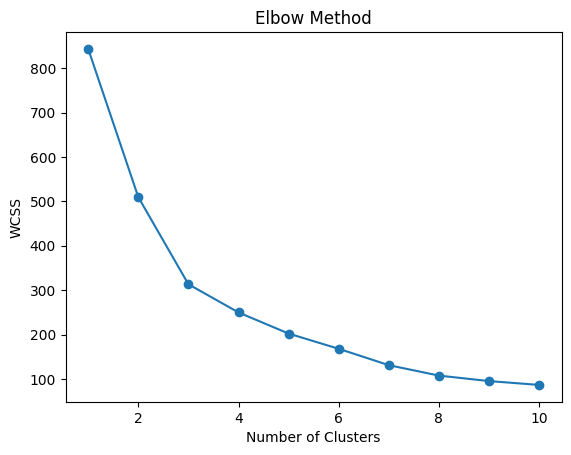

In [209]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
coords = new_features_df[['long', 'lat']].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [210]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(coords)
    score = silhouette_score(coords, cluster_labels)
    print(f'Clusters: {i}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.38251167836092254
Clusters: 3, Silhouette Score: 0.43066672929965266
Clusters: 4, Silhouette Score: 0.40906601793670777
Clusters: 5, Silhouette Score: 0.3888073715150092
Clusters: 6, Silhouette Score: 0.39276352725122016
Clusters: 7, Silhouette Score: 0.41610547812604687
Clusters: 8, Silhouette Score: 0.4310737481124736
Clusters: 9, Silhouette Score: 0.4256811223051163
Clusters: 10, Silhouette Score: 0.42238039376079384


These results revealed that from the elbow method, 3 clusters is the most optimal number before adding more clusters results in diminishing returns. From the silhouette score, using 3 vs 8 clusters have very similar scores (0.430 vs 0.431), with 8 clusters having a slightly higher score. 

Upon assessment, the group decided to use 8 clusters for this dataset for several reasons. Having 8 clusters can ensure more granularity in identifying trends, as using 3 clusters may oversimplify the data considering the geographical size of King County. 

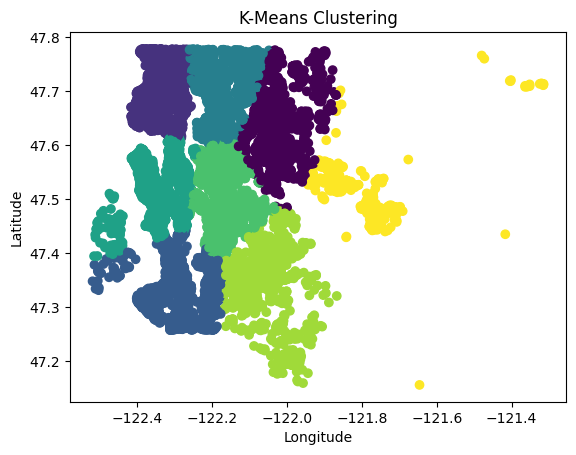

In [211]:
kmeans = KMeans(n_clusters=8, random_state=42)
new_features_df['neighborhood_cluster'] = kmeans.fit_predict(coords)

plt.scatter(new_features_df['long'], new_features_df['lat'], c=new_features_df['neighborhood_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [212]:
new_features_df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
full_bathrooms            0
partial_bathrooms         0
full_floors               0
partial_floors            0
year_sale                 0
month_sale                0
week_day                  0
age                       0
time_since_renovation     0
living_area_ratio         0
bedroom_bathroom_ratio    8
rooms_per_floor           0
relative_living_space     0
relative_lot_space        0
area                

There appear to be 8 blanks in the data. Let us check what is causing this to occur.

In [213]:
null_rows = new_features_df[new_features_df['bedroom_bathroom_ratio'].isnull()]

print("\nAnalysis of Rows with Null bedroom_bathroom_ratio:")
print("-" * 50)
columns_to_check = ['bedrooms', 'full_bathrooms', 'bedroom_bathroom_ratio']
print(null_rows[columns_to_check].to_string())


Analysis of Rows with Null bedroom_bathroom_ratio:
--------------------------------------------------
       bedrooms  full_bathrooms  bedroom_bathroom_ratio
875           0               0                     NaN
3119          0               0                     NaN
6994          0               0                     NaN
9773          0               0                     NaN
9854          0               0                     NaN
14423         0               0                     NaN
18379         0               0                     NaN
19452         0               0                     NaN


It would seem that the null values are caused by houses with 0 bedrooms and full_bathrooms. The NaN values will be replaced by zeroes.

In [214]:
new_features_df = new_features_df.replace(np.nan, 0)
new_features_df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
full_bathrooms            0
partial_bathrooms         0
full_floors               0
partial_floors            0
year_sale                 0
month_sale                0
week_day                  0
age                       0
time_since_renovation     0
living_area_ratio         0
bedroom_bathroom_ratio    0
rooms_per_floor           0
relative_living_space     0
relative_lot_space        0
area                

Now that the data is all ready, we will copy this data into `results_df` for further analysis in the following sections. A copy of this dataframe is also saved into `new_features.csv` for better visualization.

In [215]:
result_df = new_features_df
HousePrices.save_dataframe(new_features_df, 'new_features.csv')

True

In [216]:
expanded_house_prices_df = result_df
expanded_house_prices_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,week_day,age,time_since_renovation,living_area_ratio,bedroom_bathroom_ratio,rooms_per_floor,relative_living_space,relative_lot_space,area,neighborhood_cluster
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,Monday,69,69,0.21,3.00,4.00,0.88,1.00,suburban,4
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,Tuesday,73,33,0.35,1.50,2.50,1.52,0.95,urban,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,Wednesday,91,91,0.08,2.00,3.00,0.28,1.24,suburban,3
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,Tuesday,59,59,0.39,1.33,7.00,1.44,1.00,rural,4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,Wednesday,37,37,0.21,1.50,5.00,0.93,1.08,suburban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,Wednesday,15,15,1.35,1.50,1.67,1.00,0.75,urban,1
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,Monday,10,10,0.40,2.00,3.00,1.26,0.81,suburban,4
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,Monday,15,15,0.76,inf,1.00,1.00,0.67,urban,4
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,Friday,20,20,0.67,1.50,2.50,1.13,1.86,suburban,0


## 6. Exploratory Data Analysis


This section uncovers patterns, trends, and relationships within the housing dataset to better understand the factors influencing house prices. Housing markets are complex, shaped by numerous variables such as property size, location, age, and amenities. Through this analysis, we aim to highlight the key drivers of price variation and offer insights into both spatial and temporal trends within the dataset.

### 6.1. Distribution of Housing Prices

We begin by examining the distribution of housing prices to understand the overall market dynamics. This initial overview sets the stage for deeper exploration into the relationships between house prices and other key factors.

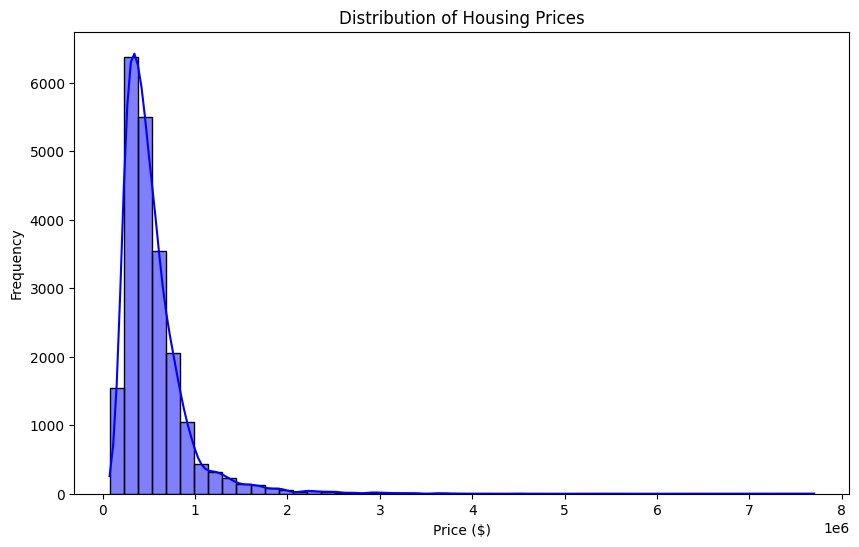

In [217]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(expanded_house_prices_df['price'], kde=True, bins=50, color='blue')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

The distribution of housing prices is heavily right-skewed, with the majority of properties priced under $1 million. This indicates that while most homes are relatively affordable, there is a smaller subset of high-value, luxury properties that significantly drive up the tail end of the distribution. The concentration of homes in lower price ranges highlights affordability as a key characteristic of this housing market, but the presence of outliers suggests pockets of exclusivity or premium housing.

### 6.2. Overall Feature Correlations

We now turn to identifying the key factors that influence property values. By examining correlations among variables, we can uncover how attributes like size, condition, or location interact with price. This matrix serves as a foundation for understanding which features are most impactful in driving housing prices and shaping the broader market.

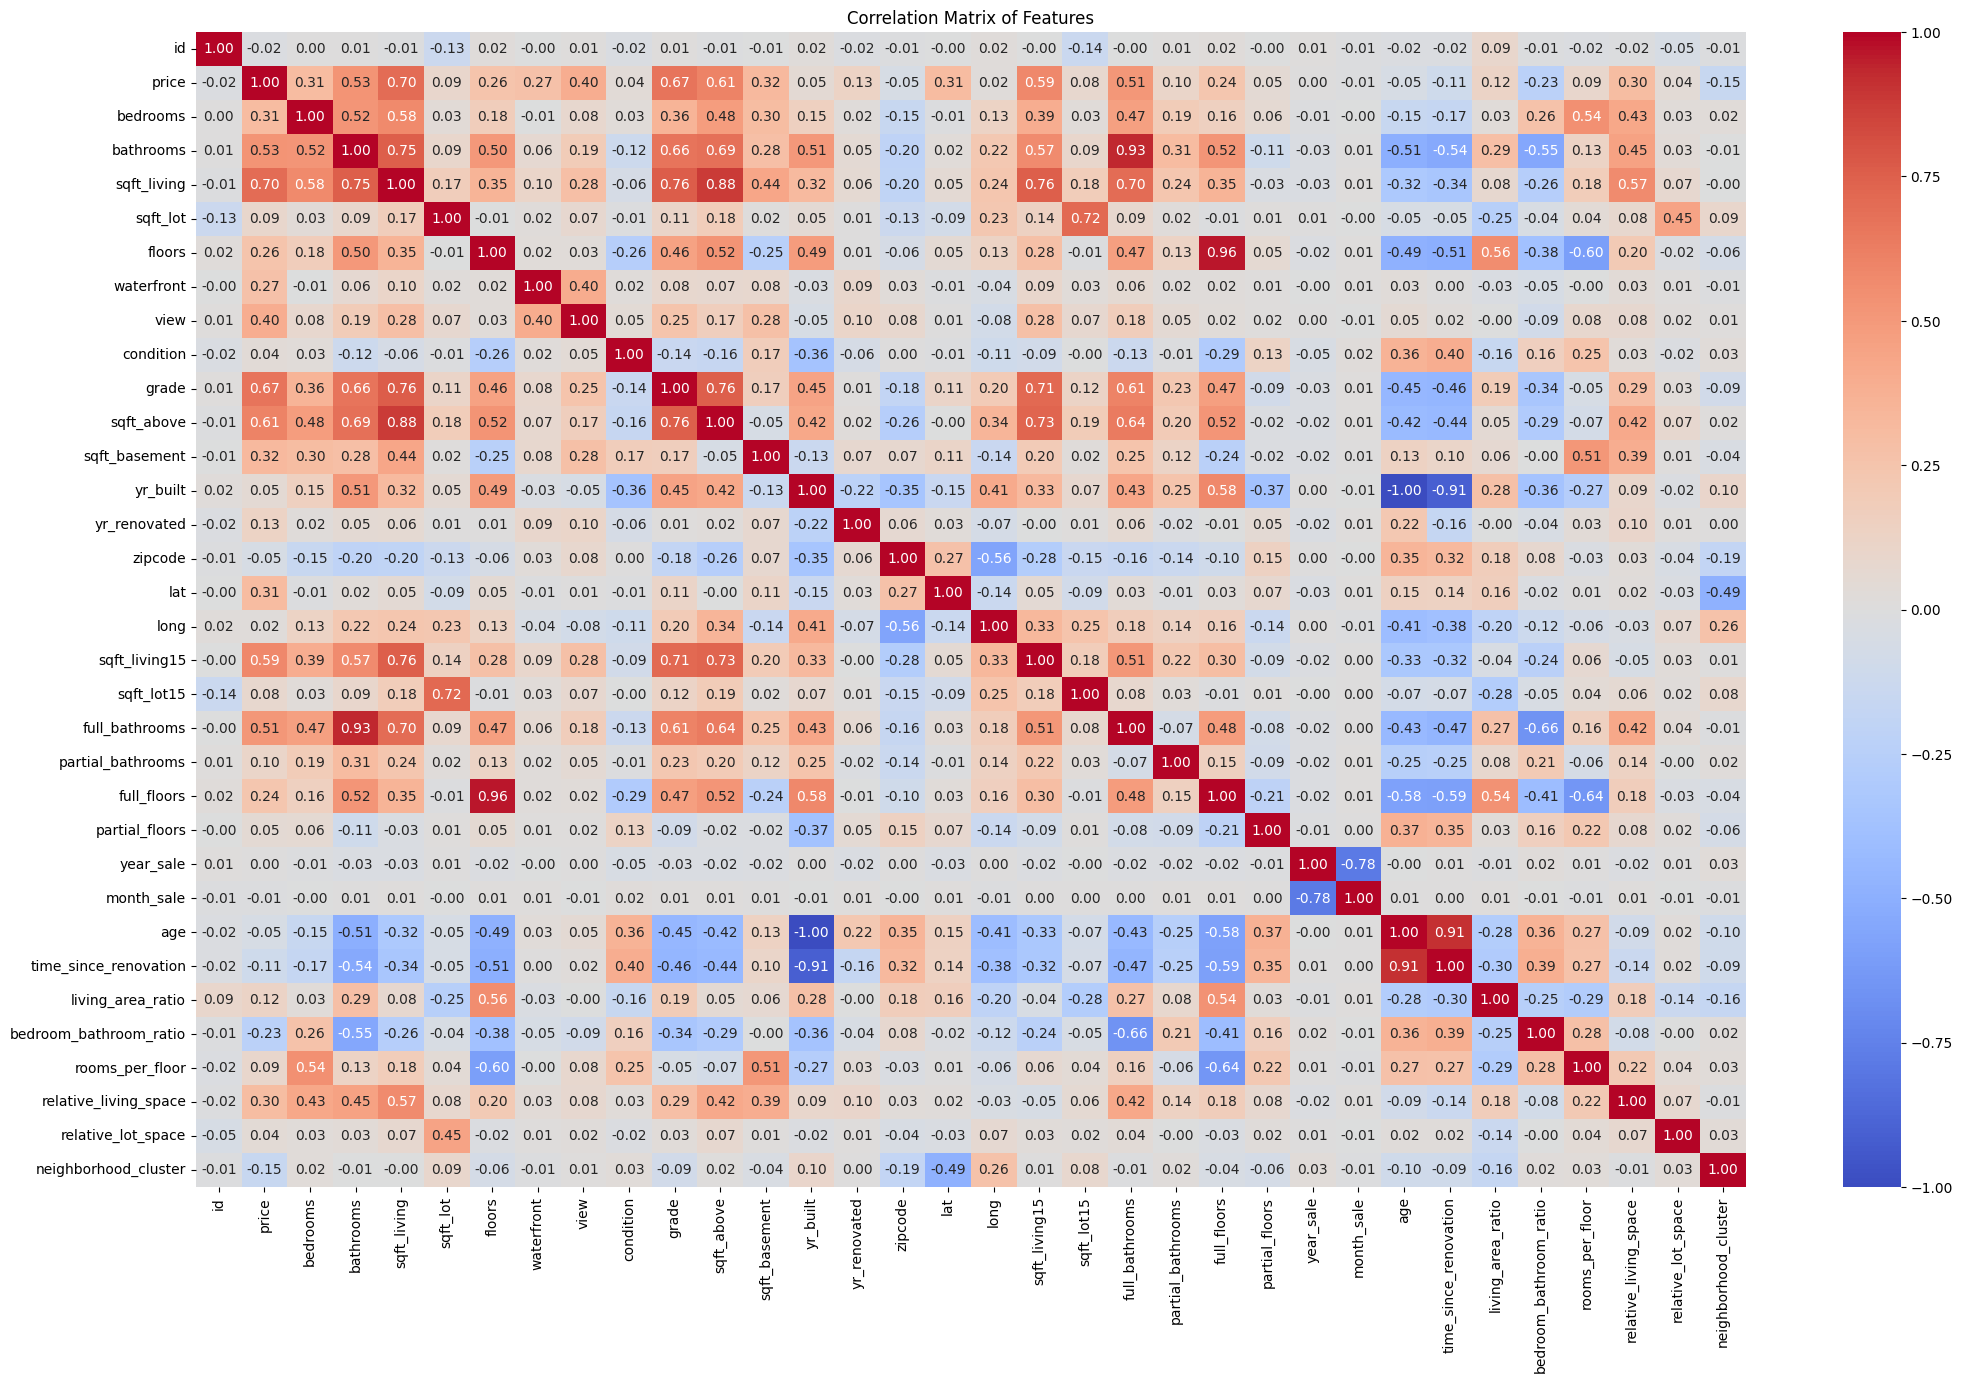

In [218]:
plt.figure(figsize=(25, 15))
corr_matrix = expanded_house_prices_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

The **strongest correlates with price** include *living area* (`sqft_living`), which has the highest positive correlation with price (`0.70`), reinforcing the notion that larger homes are more valuable. Similarly, `grade` (overall construction and design quality) exhibits a strong positive correlation (`0.67`), indicating that buyers place a premium on higher-quality builds. Other notable features include *bathrooms* (`0.53`) and *view* (`0.40`), suggesting that amenities and aesthetics also play a key role in pricing.

**Spatial influences** like *zipcode* and *longitude/latitude* show weaker correlations with price, highlighting that while location matters, attributes such as size or quality have a more direct impact on housing value.

Among the **negatively correlated features**, *house age* (`yr_built`) stands out with a correlation of `-0.36`, showing that newer homes tend to be more valuable. Similarly, *time since renovation* is negatively correlated with price, suggesting that recently renovated homes command higher values.

The matrix also reveals **multi-feature interactions**, such as the strong relationship between *sqft_above, sqft_basement*, and *total living area*, which places emphasis on their combined influence on price.

This analysis highlights that size, quality, and condition are the primary drivers of housing prices, while location plays a nuanced but secondary role. 

### 6.3. Relationship between Key Features

Building on the correlation analysis, we now examine specific relationships between key features and housing prices to uncover patterns that influence property values. This section focuses on three aspects:

1. Living Area vs. Price: Does a larger living area translate to higher prices?
2. Living Area Ratio vs. Price: How efficiently do homes utilize their lot space, and does this affect pricing?
3. Waterfront vs. Price: How much of a premium do waterfront properties command?

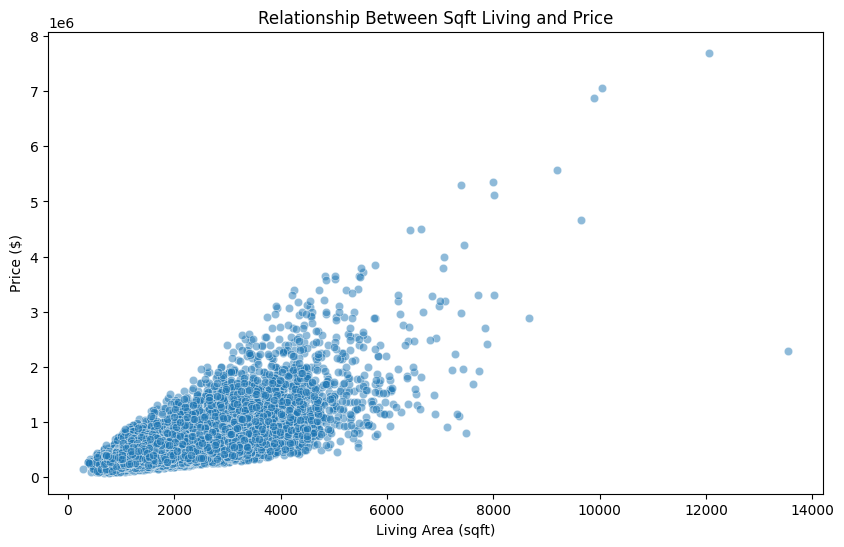

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=expanded_house_prices_df, x='sqft_living', y='price', alpha=0.5)
plt.title("Relationship Between Sqft Living and Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price ($)")
plt.show()

The scatterplot demonstrates a strong positive relationship between living area (`sqft_living`) and `price`. Larger homes tend to command higher values, with prices increasing more steeply for homes exceeding 4,000 sqft. This trend reflects a premium placed on larger properties, likely driven by demand in luxury markets. Outliers, such as homes with extremely large living areas, cluster at the upper price spectrum, indicating their exclusivity and appeal to high-income buyers.

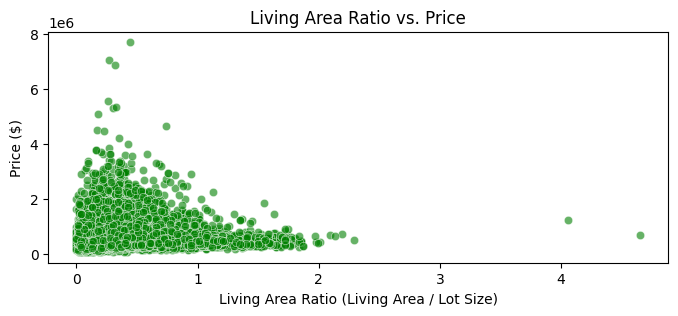

In [220]:
plt.figure(figsize=(8, 3))
sns.scatterplot(
    data=expanded_house_prices_df, x='living_area_ratio', y='price', alpha=0.6, color='green'
)
plt.title("Living Area Ratio vs. Price")
plt.xlabel("Living Area Ratio (Living Area / Lot Size)")
plt.ylabel("Price ($)")
plt.show()

The scatterplot above introduces the concept of living area ratio (the proportion of lot size occupied by the home). While the relationship is less pronounced compared to absolute living area, **homes with higher living area ratios tend to achieve higher prices**, likely due to efficient use of available space in urban and suburban areas. However, extremely high ratios are rare and may represent highly compact or unique properties, often at the extremes of pricing.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/736050076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=expanded_house_prices_df, x='waterfront', y='price', palette='coolwarm')


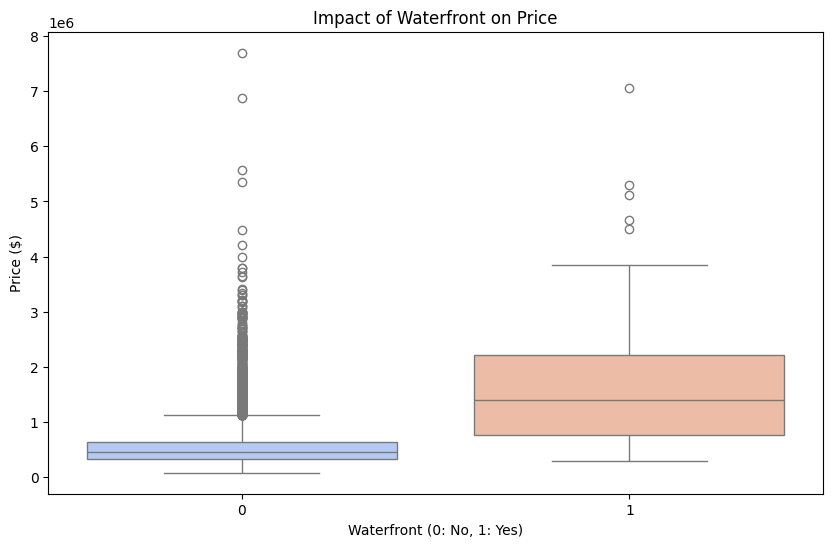

In [221]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=expanded_house_prices_df, x='waterfront', y='price', palette='coolwarm')
plt.title("Impact of Waterfront on Price")
plt.xlabel("Waterfront (0: No, 1: Yes)")
plt.ylabel("Price ($)")
plt.show()

The boxplot reveals a substantial premium associated with waterfront properties. Homes with waterfront access have significantly higher median prices, often exceeding $2 million. This reflects the desirability of waterfront homes for their exclusivity, aesthetic appeal, and access to natural amenities. Conversely, non-waterfront homes exhibit a much wider spread of prices, driven by variability in other factors like location and size.

In [222]:
from scipy.stats import ttest_ind

# Split the data
waterfront_prices = expanded_house_prices_df[expanded_house_prices_df['waterfront'] == 1]['price']
non_waterfront_prices = expanded_house_prices_df[expanded_house_prices_df['waterfront'] == 0]['price']

# Perform t-test
t_stat, p_value = ttest_ind(waterfront_prices, non_waterfront_prices)

# Print results
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in prices is statistically significant.")
else:
    print("The difference in prices is not statistically significant.")

T-Statistic: 40.63, P-Value: 0.0000
The difference in prices is statistically significant.


To validate the observed premium of waterfront properties, we performed a t-test to compare the mean prices of waterfront and non-waterfront homes. The results yield a **T-Statistic of 40.63** and a **P-Value of 0.0000**, confirming that the difference in prices is statistically significant at the 5% level. This finding reinforces the boxplot analysis, establishing that **waterfront properties command significantly higher prices**.

These statistical results, combined with earlier visualizations, reinforce the impact of **physical size**, **space efficiency**, and **aesthetic features** on housing prices. While larger and waterfront properties dominate the upper pricing tiers, efficient land use also emerges as a valuable trait, particularly in denser areas. These findings show how diverse buyer priorities shape the housing market.

### 6.4. Condition of Older Houses

Continuing with the temporal aspects of the dataset, we now explore how the condition of houses has evolved over time. This analysis highlights whether older houses have lower quality due to age-related deterioration or if they maintain their condition due to renovations and upkeep. Understanding these trends is crucial for identifying housing quality issues and prioritizing areas for maintenance or redevelopment.

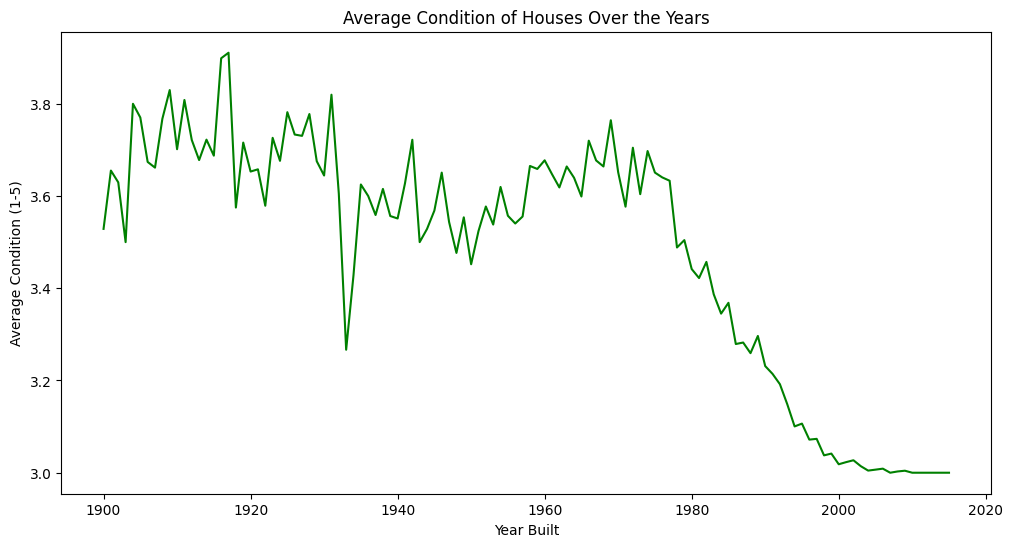

In [223]:
average_condition = expanded_house_prices_df.groupby('yr_built')['condition'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_condition, x='yr_built', y='condition', color='green')
plt.title("Average Condition of Houses Over the Years")
plt.xlabel("Year Built")
plt.ylabel("Average Condition (1-5)")
plt.show()

The line plot reveals a noticeable decline in the average condition of houses as they age. Houses built before the 1950s generally exhibit higher average condition scores, indicating better maintenance or construction quality. However, houses built after the 1960s show a steady and significant decline in condition, with the trend becoming more pronounced for houses built in the late 20th century and beyond.

This pattern suggests two potential drivers:

1. **Older homes may benefit from renovations**, which improve their condition scores despite their age.
2. **Newer homes might reflect lower initial construction quality**, possibly due to changes in building practices or materials over time.

### 6.5. Housing Density by Zip Code

Moving on from temporal trends to spatial insights, we explore housing density across zip codes to understand how supply is distributed geographically. This analysis provides valuable context for market dynamics, highlighting urbanized areas with high housing concentrations versus rural or suburban regions with sparser development. These patterns are critical for understanding how housing supply and price disparities are shaped geographically.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/1733336475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=houses_per_zip, x='zipcode', y='house_count', palette='viridis')


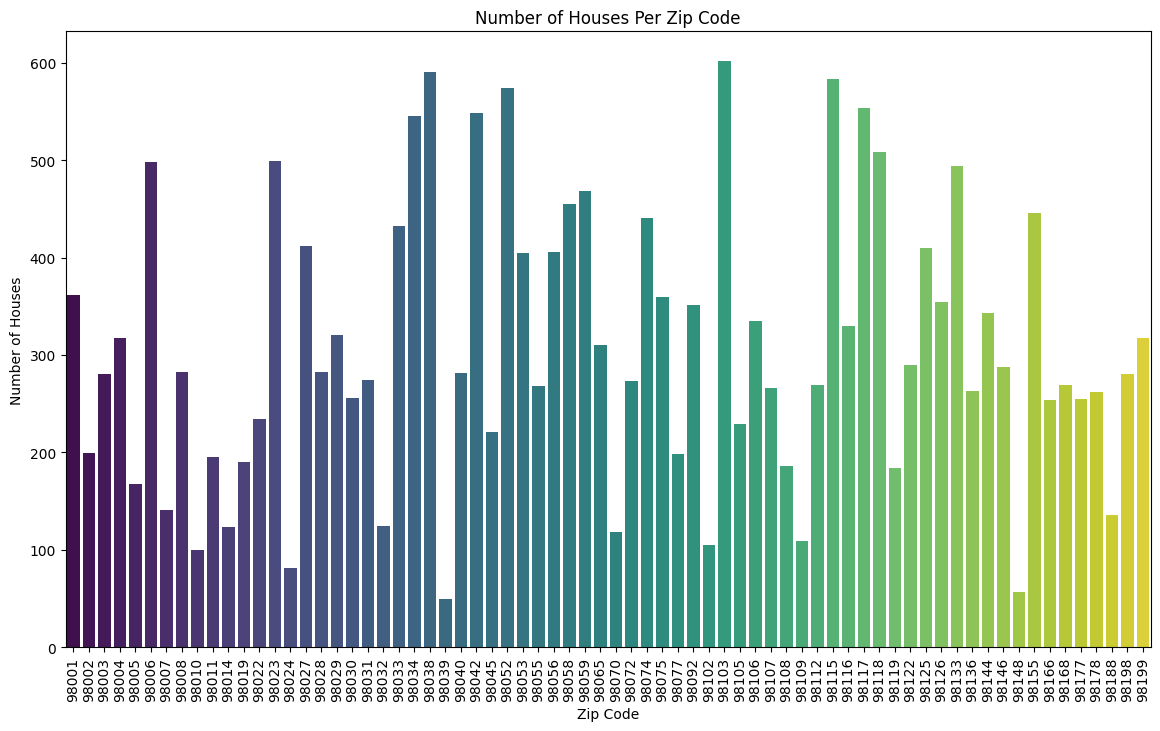

In [224]:
houses_per_zip = expanded_house_prices_df['zipcode'].value_counts().reset_index()
houses_per_zip.columns = ['zipcode', 'house_count']
plt.figure(figsize=(14, 8))
sns.barplot(data=houses_per_zip, x='zipcode', y='house_count', palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Houses Per Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Number of Houses")
plt.show()

The bar chart displays the number of houses within each zip code. The data reveals significant variability in housing density, with certain zip codes, such as `98052` and `98103`, hosting over 600 homes, indicating highly developed and likely urbanized areas. In contrast, zip codes like `98024` and `98014` exhibit much lower housing counts, suggesting more rural or suburban development patterns.

This uneven distribution highlights urban centers with concentrated housing versus sparsely populated regions. High-density areas may experience increased competition for resources, higher property values, and greater infrastructure demands, whereas lower-density regions may offer more space but fewer amenities.

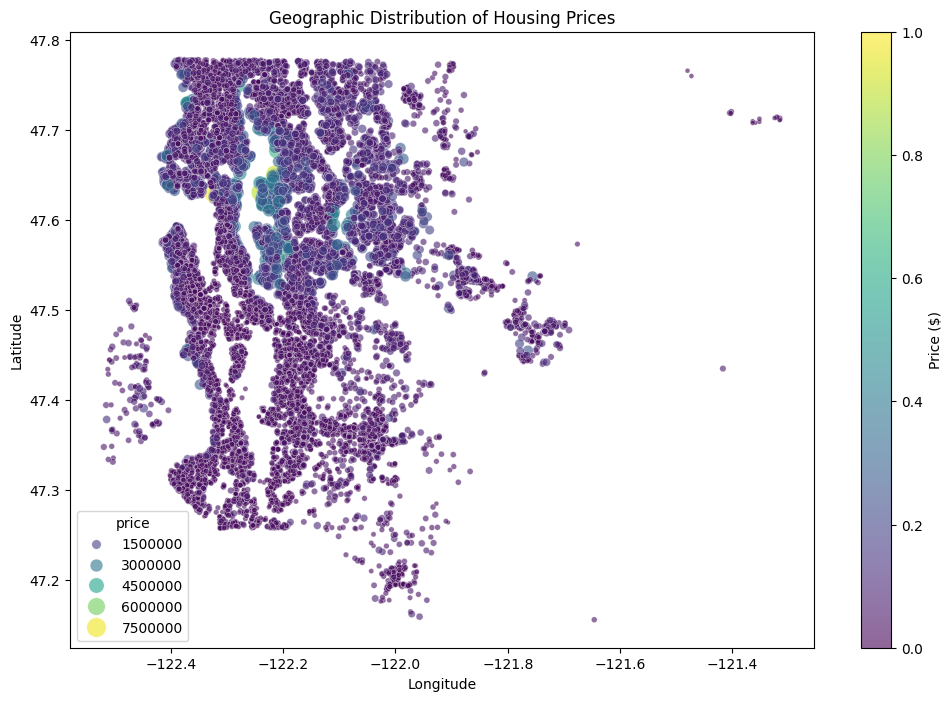

In [225]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=expanded_house_prices_df, 
    x='long', y='lat', hue='price', size='price',
    palette='viridis', sizes=(10, 200), alpha=0.6
)
plt.title("Geographic Distribution of Housing Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter.collections[0], label="Price ($)")
plt.show()

The scatterplot maps housing prices geographically using longitude and latitude, revealing spatial trends. Higher-priced properties tend to cluster in specific areas, particularly near **waterfronts or city centers**, where demand and exclusivity drive up prices. The distribution also highlights areas with lower-priced homes, typically located farther from central urban hubs.

This geographic visualization emphasizes the influence of **location** on pricing and the role of urbanization in concentrating both supply and high-value properties.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/3086522833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_cluster, x='neighborhood_cluster', y='price', palette='viridis')


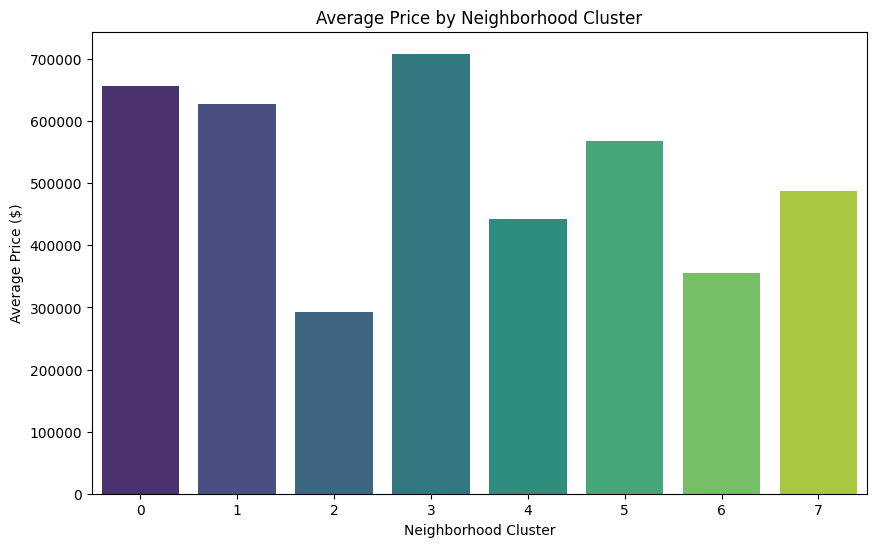

In [226]:
# Average price by neighborhood cluster
avg_price_cluster = expanded_house_prices_df.groupby('neighborhood_cluster')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_cluster, x='neighborhood_cluster', y='price', palette='viridis')
plt.title("Average Price by Neighborhood Cluster")
plt.xlabel("Neighborhood Cluster")
plt.ylabel("Average Price ($)")
plt.show()

Finally, analyzing neighborhood clusters provides further granularity into spatial trends. The bar chart shows the **average price by cluster**, with clusters like **Cluster 3** and **Cluster 0** commanding the highest average prices, likely due to their proximity to urban centers or desirable features such as waterfront access. Conversely, clusters such as **Cluster 2** have significantly lower prices, reflecting more affordable housing options in less competitive or less desirable areas.

These visualizations collectively illustrate the clear influence of **geography** and **density** on housing markets. Urbanized zip codes and high-value clusters dominate in pricing, reflecting the premium on accessibility and desirability. At the same time, rural and suburban areas offer lower prices, catering to buyers prioritizing affordability and space over location. This spatial analysis highlights the need for balanced development to address housing affordability and accessibility across different regions.

### 6.6. Price Trends by Area Type

Building on the spatial analysis of housing density, we now investigate how average housing prices vary across broader area classifications: urban, suburban, and rural. This breakdown helps us understand how location type influences property value, offering insights into the pricing dynamics of different living environments.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/81184487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_area, x="area", y="price", palette="viridis")


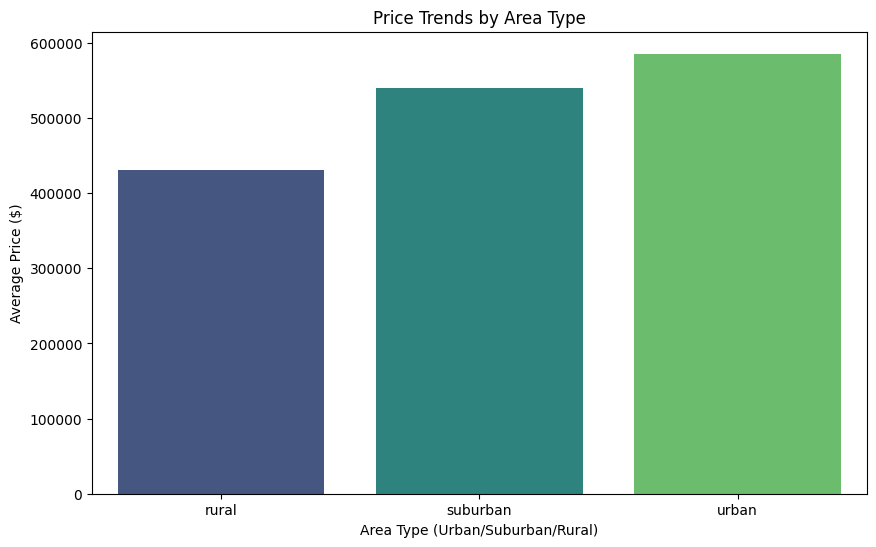

In [227]:
avg_price_area = expanded_house_prices_df.groupby("area")["price"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_area, x="area", y="price", palette="viridis")
plt.title("Price Trends by Area Type")
plt.xlabel("Area Type (Urban/Suburban/Rural)")
plt.ylabel("Average Price ($)")
plt.show()

The bar chart illustrates that **urban areas command the highest average housing prices**, followed closely by suburban areas, while rural areas have the lowest average prices. Urban homes, with their proximity to amenities, infrastructure, and job markets, likely attract a premium due to their desirability. Suburban areas, offering a balance of accessibility and space, maintain relatively high prices but still lag behind urban locations. Rural areas, characterized by greater distance from urban hubs and lower development, reflect lower average prices.

This trend emphasizes the role of **location accessibility and lifestyle preferences** in shaping property values. Urban housing markets cater to buyers seeking convenience and access to economic centers, while suburban and rural areas appeal to those prioritizing affordability or space.

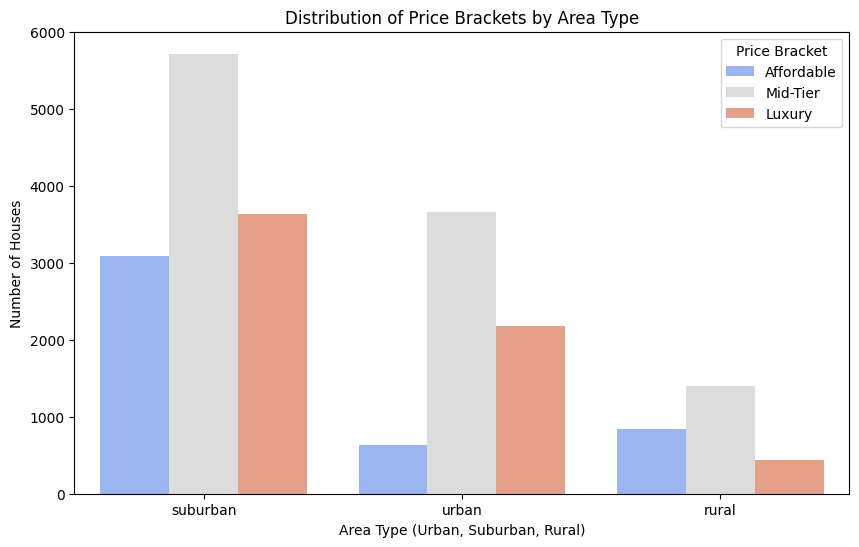

In [228]:
# Define price brackets
bins = [0, 300000, 600000, expanded_house_prices_df['price'].max()]
labels = ['Affordable', 'Mid-Tier', 'Luxury']
expanded_house_prices_df['price_bracket'] = pd.cut(expanded_house_prices_df['price'], bins=bins, labels=labels)

# Plot the distribution across area types
plt.figure(figsize=(10, 6))
sns.countplot(data=expanded_house_prices_df, x='area', hue='price_bracket', palette='coolwarm')
plt.title("Distribution of Price Brackets by Area Type")
plt.xlabel("Area Type (Urban, Suburban, Rural)")
plt.ylabel("Number of Houses")
plt.legend(title="Price Bracket")
plt.show()

The distribution of housing price brackets—**Affordable**, **Mid-Tier**, and **Luxury**—further deepens this insight. Suburban areas dominate the **Affordable** and **Mid-Tier** categories, reflecting their appeal to a broad range of buyers. Urban areas, while having fewer affordable options, show significant representation in the **Luxury** category, aligning with their premium pricing. Rural areas predominantly feature affordable housing, with very few luxury properties, highlighting their position as the most budget-friendly option.

These findings demonstrate the **strong correlation between location type and housing affordability**. Urban areas are synonymous with luxury, suburban regions balance affordability and mid-tier housing, and rural zones cater to budget-conscious buyers. Together, this analysis illustrates how geographic factors influence market segmentation and pricing, reinforcing the role of location in determining housing affordability.

### 6.7. Impact of House Age on Price

After exploring how location influences housing prices, we now turn to the relationship between house age and price. Understanding this dynamic is crucial for assessing the value retention or depreciation of older homes compared to newer constructions. Age can reflect the durability of materials, the need for renovations, or the historical significance of properties.

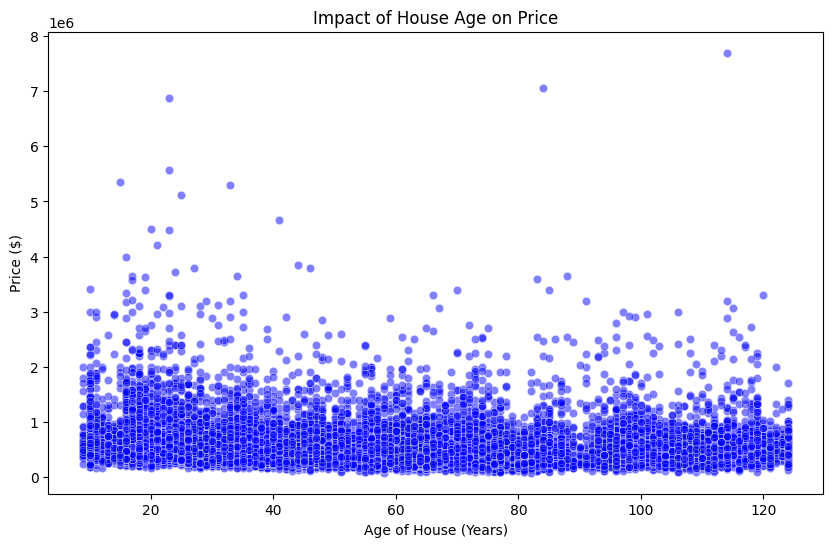

In [229]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=expanded_house_prices_df, x="age", y="price", alpha=0.5, color="blue")
plt.title("Impact of House Age on Price")
plt.xlabel("Age of House (Years)")
plt.ylabel("Price ($)")
plt.show()

The scatterplot indicates that while there is no strong linear relationship between house age and price, certain patterns emerge:

- **Newer houses (under 20 years old)** tend to have a slightly higher concentration of higher-priced homes, suggesting that buyers often prefer newer constructions for modern amenities and lower maintenance requirements.
- **Older homes (over 60 years)** show a more dispersed price distribution, with fewer high-value properties. This may indicate depreciation due to aging infrastructure or less market demand for older homes.
- However, outliers exist across all age ranges, with a few older houses commanding extremely high prices. This could be due to renovations, historical value, or prime locations.

Overall, the data highlights that while newer houses are generally more expensive, the market for older homes is highly varied and dependent on additional factors like condition, renovations, and location.

### 6.8. Renovation Patterns Over Time

Following the temporal analysis of housing, we explore the impact of renovations on property value and their frequency over time. Renovations play a critical role in maintaining and enhancing the appeal and market value of houses, particularly for older properties. By examining the distribution of time since the last renovation, we aim to identify patterns in renovation activity and their implications for housing prices.

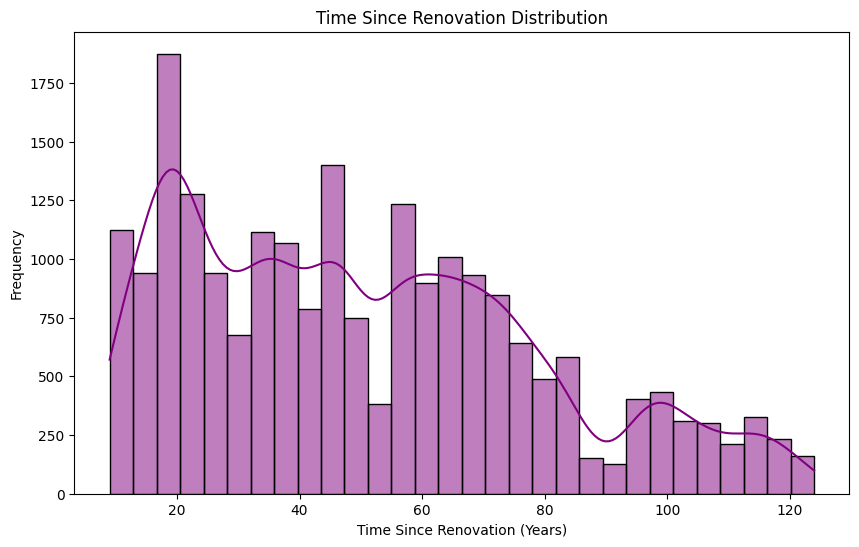

In [230]:
plt.figure(figsize=(10, 6))
sns.histplot(data=expanded_house_prices_df, x="time_since_renovation", bins=30, kde=True, color="purple")
plt.title("Time Since Renovation Distribution")
plt.xlabel("Time Since Renovation (Years)")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of time since the last renovation for houses in the dataset. Key observations include:

- **Peak Frequency at 20 Years**: Renovations are most common within the last 20 years, suggesting that homeowners frequently update properties to maintain their value or adapt to modern living standards.
- **Steady Decline Beyond 50 Years**: As the time since renovation increases, the frequency declines significantly, indicating that fewer homes undergo major updates after long periods of neglect or aging.
- **Outliers at 100+ Years**: Some houses with no recent renovations represent properties that are either historically significant or undermaintained.

These findings highlight the importance of consistent renovations in maintaining the livability and value of homes. They also suggest a **concentration of renovations in relatively newer properties**, where the cost-to-benefit ratio is likely more favorable.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/503134533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=expanded_house_prices_df, x='renovated', y='price', palette='coolwarm')


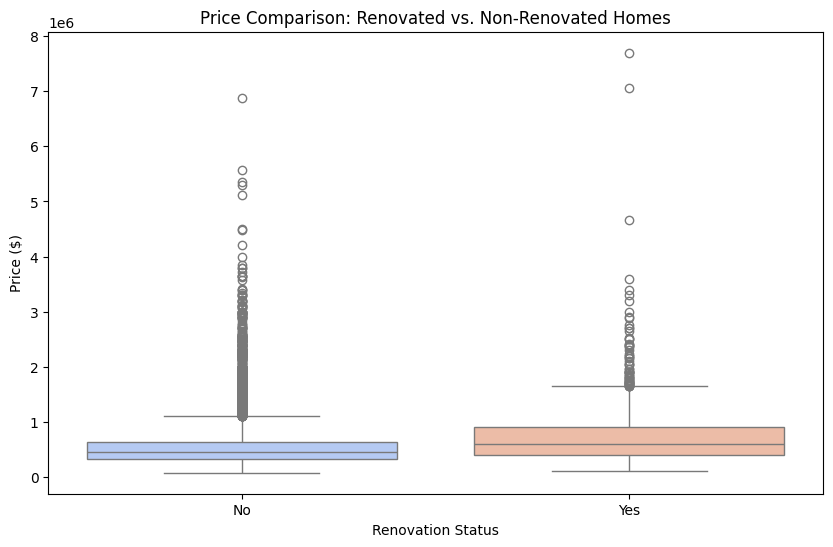

In [231]:
import seaborn as sns

expanded_house_prices_df['renovated'] = expanded_house_prices_df['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')

plt.figure(figsize=(10, 6))
sns.boxplot(data=expanded_house_prices_df, x='renovated', y='price', palette='coolwarm')
plt.title("Price Comparison: Renovated vs. Non-Renovated Homes")
plt.xlabel("Renovation Status")
plt.ylabel("Price ($)")
plt.show()

The boxplot provides a comparative analysis of housing prices for renovated and non-renovated properties. **Renovated homes** command significantly higher prices, reflecting the value placed on modernized features and structural updates. Conversely, **non-renovated homes** show a lower median price and a narrower price range, emphasizing the depreciation associated with older or outdated features.

This analysis shows the **economic advantages of renovations**, both for maintaining property appeal and commanding a higher market value. It aligns with earlier observations about the relationship between house age and condition, further reinforcing the role of updates in bridging the gap between older structures and current buyer preferences.

### 6.9. Feature Importance

To gain a deeper understanding of the factors driving housing prices, we employed a Random Forest Regressor to identify the relative importance of various features in predicting property values. This analysis allows us to quantify the impact of different characteristics—ranging from physical attributes like size and condition to location-based variables such as proximity and waterfront access—on market pricing.

/var/folders/gq/qcylyt8n3fxffssvbsn5q06m0000gn/T/ipykernel_44640/3395665715.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


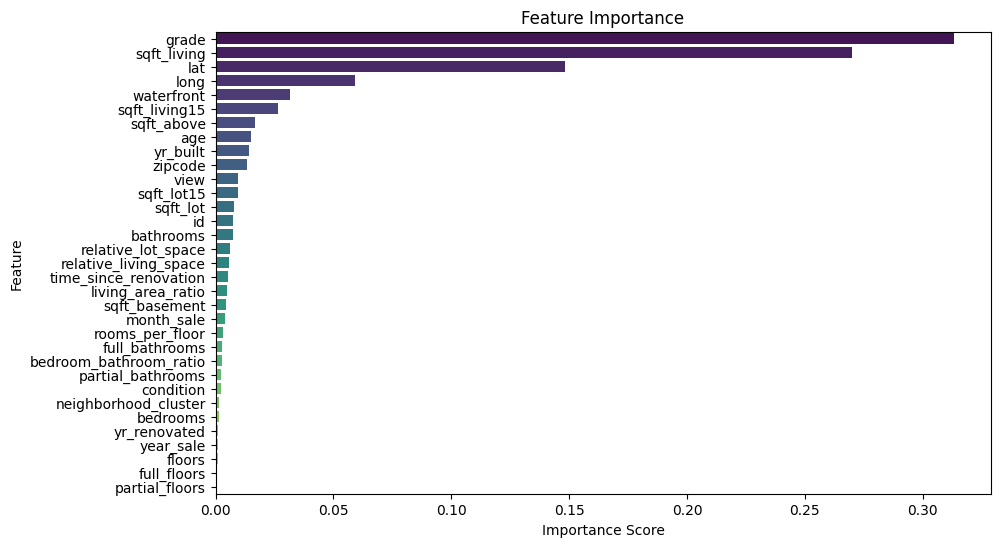

In [232]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the dataset
X = expanded_house_prices_df.drop(['price'], axis=1)._get_numeric_data()

# Replace infinite values with NaN and then fill NaN values with the mean of the column
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

y = expanded_house_prices_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

The bar chart ranks features based on their importance score derived from the Random Forest model. Key insights include:

- **Grade and Living Area as Dominant Predictors**: The `grade` of the house (a measure of construction and design quality) and `sqft_living` (the total living area) emerge as the most influential factors, highlighting the premium associated with better-built and more spacious homes.
- **Location Variables**: `Latitude` and `longitude` also score highly, underscoring the importance of geographic placement in determining property values. This aligns with earlier spatial analyses that identified high-value clusters in urban and waterfront areas.
- **Aesthetic Features**: Features like `waterfront` and `view` have a notable influence, reflecting the market’s preference for visually appealing and scenic locations.
- **Age and Renovation**: While less impactful, variables like `age`, `time_since_renovation`, and `condition` still contribute, emphasizing the role of property upkeep and structural integrity.
- **Minor Predictors**: Factors such as `bedrooms`, `bathrooms`, and `floors` show relatively low importance, suggesting that buyers place more value on total livable space and overall quality rather than specific room counts.

This analysis confirms the dominance of `quality`, `space`, and `location` in shaping housing prices. Buyers prioritize the overall design and functionality (`grade` and `sqft_living`), while location-based variables like `latitude`, `longitude`, and `waterfront` access further drive pricing disparities. Less influential features, such as individual room counts or lot size ratios, play a supporting role but do not independently drive substantial price variation.

By quantifying these contributions, this section bridges the insights from earlier exploratory analyses with predictive modeling, offering a holistic view of the critical drivers of housing market trends.

### 6.10. Temporal Trends in Pricing

As we conclude the exploratory data analysis, it is essential to investigate temporal trends in housing prices to uncover how average property values evolved over the observed period. While previous sections focused on structural, spatial, and feature-based drivers of pricing, this section emphasizes the role of time in shaping market dynamics, reflecting broader economic and market forces.

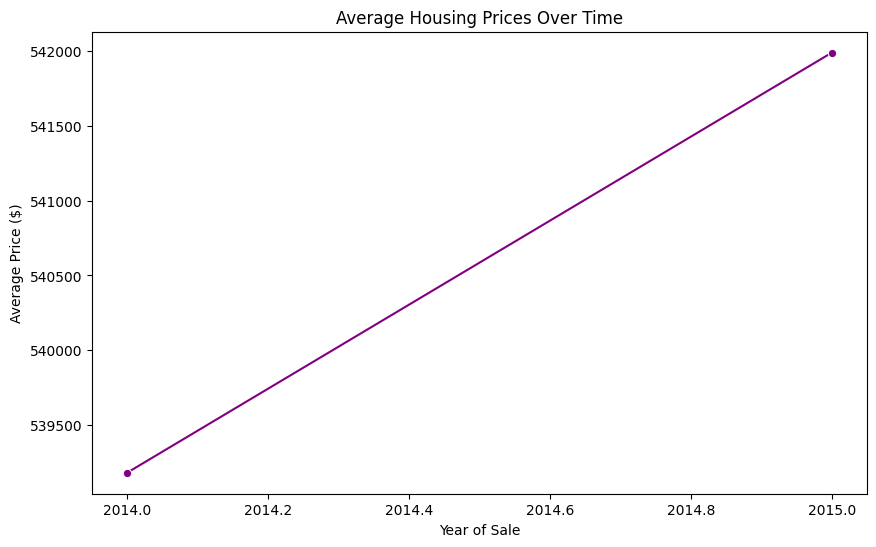

In [233]:
expanded_house_prices_df['year_sale'] = pd.to_datetime(expanded_house_prices_df['date']).dt.year

# Average price by year
avg_price_by_year = expanded_house_prices_df.groupby('year_sale')['price'].mean().reset_index()

# Plot price trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x='year_sale', y='price', marker='o', color='purple')
plt.title("Average Housing Prices Over Time")
plt.xlabel("Year of Sale")
plt.ylabel("Average Price ($)")
plt.show()

The line plot illustrates a **steady increase in average housing prices** from 2014 to 2015. The trend suggests that housing prices rose consistently during this period, with average prices climbing from approximately **$539,500 in early 2014 to $542,000 by 2015**. Although the timeframe is relatively short, this upward trajectory aligns with patterns of market appreciation driven by factors such as **rising demand, limited supply, and economic growth** in the region.

This consistent growth highlights the dynamic nature of the housing market, where external factors—such as **interest rates, urban development, and demographic shifts**—likely played a significant role.

This section serves as the final piece in the broader narrative, tying together how various factors—including location, quality, size, and time—interact to influence housing prices. It provides a holistic view of the dataset to empower stakeholders to make data-driven decisions in an evolving market landscape.

## 7. Summary of Findings and Recommendations

### 7.1. Summary of Findings

This research explores the relationship between housing attributes such as size, location, amenities, neighborhood, and price and their implications for socioeconomic disparities. Housing prices exhibit a heavily right-skewed distribution, with most properties priced below $1 million. This indicates a generally affordable housing market, yet high-value outliers underscore the exclusivity of premium or luxury housing. Among the strongest price determinants are the house's living area, construction quality (grade), and aesthetic features like waterfront access, which correlate positively with price at 0.70, 0.67, and 0.40, respectively. These findings suggest that the physical attributes of homes hold greater weight in pricing than location-based variables such as zip code.

Spatial analysis highlights disparities in housing distribution and affordability. Urban areas were observed to have the highest prices due to their proximity to amenities, and infrastructure but offer limited affordable options. Conversely, suburban areas balance accessibility and affordability, while rural regions predominantly cater to low-income buyers. Housing density also varies widely across zip codes, with urbanized regions experiencing higher concentrations of homes, potentially straining infrastructure and widening socio-economic divides. However, homes with premium features such as waterfront access remain exclusive, reflecting socio-economic disparities in access to desirable housing amenities.

Temporal analysis of housing conditions reveals that homes built after the 1960s tend to show declining quality over time, contrasting with older homes built before 1950, which often maintain higher condition scores due to renovations or superior initial construction quality.
The number of renovated houses peaks at around the 20-year mark, suggesting its role in maintaining property value and livability. This is further supported by the price comparison between renovated vs. non-renovated homes, which found renovated homes exhibiting a higher average market value. Temporal trends also reveal a steady increase in housing prices from 2014 to 2015, likely driven by rising demand and limited supply and other factors such as interest rates, urban development, and economic growth in the region.

These findings point to a pressing need for balanced urban planning, targeted renovation programs, and equitable development strategies to bridge socio-economic housing disparities and ensure sustainable community growth.

### 7.2 Recommendations
To address the disparities identified in the analysis, the researchers propose recommendations relating to policymaking, government support, and overall community development.

Local governments could introduce subsidies, low-interest loans, or renovation programs to incentivize homeowners of older and less maintained properties. It will not only improve safety and livability but also help maintain the property's market value and aid in the modernization of the area. Future studies can be made to evaluate the effectiveness of renovation incentives in increasing property value, especially in economically disadvantaged areas.

Another issue is the high housing density in urban areas. Urban planners should prioritize a balanced approach, ensuring that high-density developments are complemented with adequate resources such as public transportation, green spaces, and essential services. Additional research should focus on understanding the relationship between housing density, quality of life, and infrastructure sustainability, which can guide the development of equitable and livable urban environments.

Lastly, premium features such as waterfront access significantly influence housing prices but are often restricted to high-income buyers. Policies should aim to make such amenities more accessible through shared-use developments, such as public waterfront parks or mixed-use community spaces. Further research is needed to assess the environmental impacts of aesthetic housing developments and explore strategies for ensuring equitable access to natural amenities without compromising ecological sustainability.

To further enhance this research, future studies could incorporate more advanced machine learning models to predict housing prices with greater accuracy and to identify subtle patterns in pricing disparities. Geospatial analysis could be expanded to include more granular data, such as neighborhood-specific trends or proximity to local amenities, to provide deeper insights into location-based pricing. Additionally, longitudinal studies examining housing market trends over extended periods could help capture the long-term effects of policy interventions, economic fluctuations, and demographic shifts on housing affordability and accessibility.

## 8. Future Work

Further research may be done to predict housing prices and further identify key factors influencing it. This may be done by enriching the same dataset from King County with other data, such as proximity to schools or other important locations, and applying data analysis and machine learning techniques. The goal is to provide actionable insights into the housing market that can aid in analyzing housing affordability, policy making, and urban planning. A Gantt Chart and the details of the 3-month research plan are provided below.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from datetime import datetime, timedelta

tasks = [
    "Verify dataset quality and clean data",
    "Enrich dataset with external factors",
    "Feature engineering and refinement",
    "Perform geospatial clustering (basic)",
    "Implement Random Forest as baseline model",
    "Experiment with advanced ML models",
    "Basic geospatial mapping of trends",
    "Analyze temporal trends",
    "Draft report with findings",
    "Prepare presentation for peers"
]

durations = [7,7,5,5,10,10,5,5,5,5]

# Adjusted starting date of the project
start_date = datetime(2024, 12, 1)

# Create task start and end dates for the adjusted plan
task_dates = [(start_date + timedelta(sum(durations[:i])), durations[i]) for i in range(len(tasks))]

# Generate Gantt chart for the adjusted plan
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.cividis(range(len(tasks)))

for i, (task, (start, duration)) in enumerate(zip(tasks, task_dates)):
    end = start + timedelta(duration - 1)
    ax.barh(y=task, width=(date2num(end) - date2num(start)), left=date2num(start), color=colors[i])

# Format x-axis as dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.xticks(rotation=45)

# Chart details
plt.title("Gantt Chart", fontsize=14)
plt.xlabel("Timeline", fontsize=12)
plt.ylabel("Tasks", fontsize=12)
plt.tight_layout()

plt.show()


1.   Verify Dataset Quality and Clean Data (Week 1)<br>
The project begins by inspecting the dataset for missing values, inconsistencies, or anomalies. Cleaning tasks will include addressing any outliers, ensuring uniformity in data formats, and validating the integrity of key features like dates, prices, and geographic coordinates.

2.   Enrich Dataset with External Factors (Week 2)<br>
External datasets that contains data such as proximity to schools, public transport, parks, and commercial hubs, will be incorporated to provide richer context. Key activities include identifying reliable data sources (e.g., APIs or public databases), merging them with the original dataset using location-based keys like zip codes or coordinates, and validating the enriched dataset for usability. This step is crucial for analyzing how external influences affect housing prices.

3. Feature Engineering and Refinement (Week 3)<br>
Advanced features will be created, such as proximity scores, and ratios that capture property utilization (e.g., living area to lot size). The engineered features will be validated through visualizations and descriptive statistics to ensure.

4. Perform Geospatial Clustering (Week 4)<br>
Using basic clustering methods like K-Means, the team will group properties based on geographic coordinates and enriched features. This step will help identify neighborhood-level trends and highlight regional disparities in pricing.

5. Implement Random Forest as Baseline Model (Week 5)<br>
A Random Forest model will serve as the baseline for predicting housing prices. This method is chosen for its interpretability and robustness, particularly in identifying key feature importance. Performance metrics like RMSE and R-squared will be used to evaluate the model.

6. Experiment with Advanced ML Models (Week 6)<br>
A more advanced machine learning model, such as Gradient Boosting (XGBoost or LightGBM), will be tested. These models can capture non-linear relationships and feature interactions, improving prediction accuracy.

7. Basic Geospatial Mapping of Trends (Week 7)<br>
Visualizations will map pricing variations across neighborhoods and proximity to amenities. Spatial patterns will be analyzed to identify high-value clusters or underserved areas.

8. Analyze Temporal Trends (Week 7)<br>
Temporal metrics will be used to examine seasonal fluctuations in housing prices. This step will integrate findings from the machine learning and geospatial analysis phases.

9. Draft Report with Findings (Week 8)<br>
The final report will compile insights from the analysis, enriched dataset, and machine learning models. It will highlight key trends, feature importance, and actionable recommendations for stakeholders.

10. Presentation (Week 8)<br>
A concise presentation will summarize the research process, findings, and implications. Visual aids like charts, maps, and model performance metrics will be emphasized to communicate effectively with a non-technical audience.

## 9. References

King County Government. (2013). King County Zip Code Boundaries. https://your.kingcounty.gov/GIS/web/Web/VMC/boundaries/zipcodes.pdf